## Project:- Movie recommendation system 

#### This project aims to build a movie recommendation mechanism within Netflix. The dataset I used here come directly from Netflix

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

loading csv file 

In [2]:
df=pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
#df.groupby('title')['rating'].count().sort_values(ascending=False)

In [5]:
dataset=df[['title','director','listed_in','description']]

In [6]:
dataset.head()

,title,director,listed_in,description
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,NaN,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,NaN,Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,NaN,Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,Fernando Lebrija,Comedies,When nerdy high schooler Dani finally attracts...


### Any missing values?

In [7]:
dataset.isnull().sum()

title             0
director       1969
listed_in         0
description       0
dtype: int64

In [8]:
dataset.isnull().sum()/len(dataset)*100

title           0.000000
director       31.584857
listed_in       0.000000
description     0.000000
dtype: float64

In [9]:
dataset.director.fillna("",inplace=True)

c:\python37\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### some data visualization

<AxesSubplot:xlabel='director,rating'>

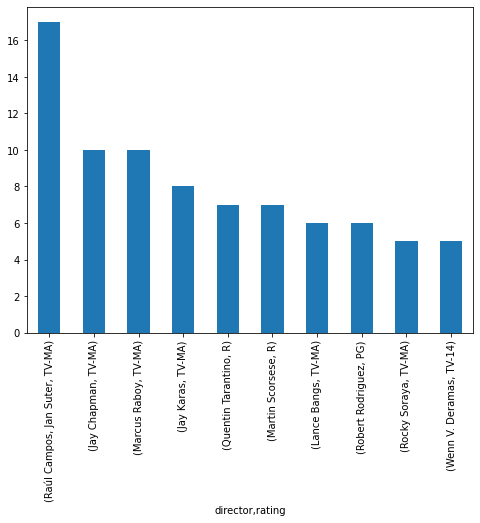

In [10]:
plt.figure(figsize=(8,6))
df.groupby('director')['rating'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

In [11]:
df.groupby('listed_in')['rating'].value_counts().sort_values(ascending=False)[:10]

listed_in                                          rating
Stand-Up Comedy                                    TV-MA     215
Dramas, International Movies                       TV-14      94
Dramas, Independent Movies, International Movies   TV-MA      86
Documentaries                                      TV-14      86
                                                   TV-MA      84
Dramas, International Movies                       TV-MA      84
Comedies, Dramas, International Movies             TV-14      79
Kids' TV                                           TV-Y       72
Crime TV Shows, International TV Shows, TV Dramas  TV-MA      70
Documentaries                                      TV-PG      65
Name: rating, dtype: int64

<AxesSubplot:xlabel='listed_in,rating'>

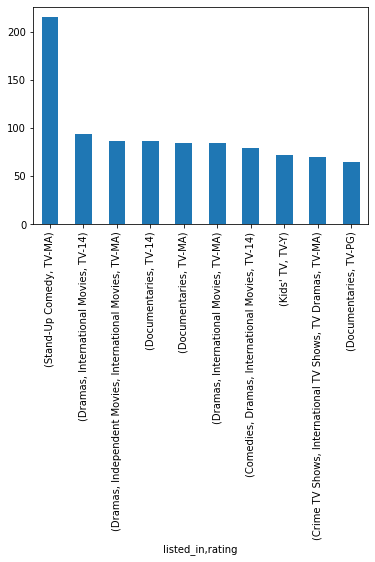

In [12]:
df.groupby('listed_in')['rating'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

Now we are going to crete another column 'movie_info' 

In [13]:
dataset['movie_info']=dataset['director']+ ' ' + dataset['listed_in']+ ' ' + dataset['description']

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
dataset.head()

,title,director,listed_in,description,movie_info
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,"Richard Finn, Tim Maltby Children & Family Mov..."
1,Jandino: Whatever it Takes,,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,Stand-Up Comedy Jandino Asporaat riffs on the...
2,Transformers Prime,,Kids' TV,"With the help of three human allies, the Autob...","Kids' TV With the help of three human allies,..."
3,Transformers: Robots in Disguise,,Kids' TV,When a prison ship crash unleashes hundreds of...,Kids' TV When a prison ship crash unleashes h...
4,#realityhigh,Fernando Lebrija,Comedies,When nerdy high schooler Dani finally attracts...,Fernando Lebrija Comedies When nerdy high scho...


we are using only two columns

In [15]:
dataset=dataset[['title','movie_info']]

In [16]:
dataset.head()

,title,movie_info
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby Children & Family Mov..."
1,Jandino: Whatever it Takes,Stand-Up Comedy Jandino Asporaat riffs on the...
2,Transformers Prime,"Kids' TV With the help of three human allies,..."
3,Transformers: Robots in Disguise,Kids' TV When a prison ship crash unleashes h...
4,#realityhigh,Fernando Lebrija Comedies When nerdy high scho...


## Text Preprocessing

removing stopwords and punctuations and presenting text in vector

In [17]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [18]:
#stopwords.words('english')[0:10]
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

#### Creating function and apply it to our DataFrame

In [19]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
         if i.strip().lower() not in stop:
                word = lemmatizer.lemmatize(i.strip())
                final_text.append(word.lower())
                
    return  " ".join(final_text)      
                

In [20]:
dataset.movie_info = dataset.movie_info.apply(lemmatize_words)

In [21]:
#dataset['movie_info']=dataset['movie_info'].apply(text_process)

In [22]:
dataset.head()

,title,movie_info
0,Norm of the North: King Sized Adventure,"richard finn, tim maltby children family movie..."
1,Jandino: Whatever it Takes,stand-up comedy jandino asporaat riff challeng...
2,Transformers Prime,"kids' tv help three human allies, autobots pro..."
3,Transformers: Robots in Disguise,kids' tv prison ship crash unleashes hundred d...
4,#realityhigh,fernando lebrija comedies nerdy high schooler ...


In [23]:

dataset['movie_info'][0]

'richard finn, tim maltby children family movies, comedies planning awesome wedding grandfather, polar bear king must take back stolen artifact evil archaeologist first.'

### Vectorization

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
tf=CountVectorizer()

In [26]:
X=tf.fit_transform(dataset['movie_info'])

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
cosine_sim=cosine_similarity(X)

In [29]:
print(cosine_sim)

[[1.         0.         0.         ... 0.0521286  0.03872015 0.04347826]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.15450786 0.11566299]
 ...
 [0.0521286  0.         0.         ... 1.         0.         0.        ]
 [0.03872015 0.         0.15450786 ... 0.         1.         0.27104108]
 [0.04347826 0.         0.11566299 ... 0.         0.27104108 1.        ]]


In [30]:
liked_movie = 'Transformers Prime'

In [31]:
index_l = dataset[dataset['title'] == liked_movie].index.values[0]

In [33]:
index_l = dataset[dataset['title'] == liked_movie].index.values[0]
similar_movies = list(enumerate(cosine_sim[index_l]))
sort_movies = sorted(similar_movies , key = lambda X:X[1] , reverse = True)
sort_movies.pop(0)
sort_movies = sort_movies[:10]

In [34]:
sort_movies

[(3, 0.34668762264076824),
 (5465, 0.3144854510165755),
 (5965, 0.3038218101251),
 (5921, 0.30261376633440124),
 (1198, 0.28915746598312014),
 (70, 0.28306925853614895),
 (4675, 0.2719641466102106),
 (6118, 0.2668802563418119),
 (1085, 0.25318484177091666),
 (5736, 0.25318484177091666)]

In [35]:
for movies in sort_movies:
    print(dataset.title[movies[0]])

Transformers: Robots in Disguise
You vs. Wild
3Below: Tales of Arcadia
Mutant Busters
Paap-O-Meter
We Bare Bears
Atomic Puppet
Space Jungle
The Charming Stepmom
The Dragon Prince
